In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os

In [2]:
%matplotlib inline

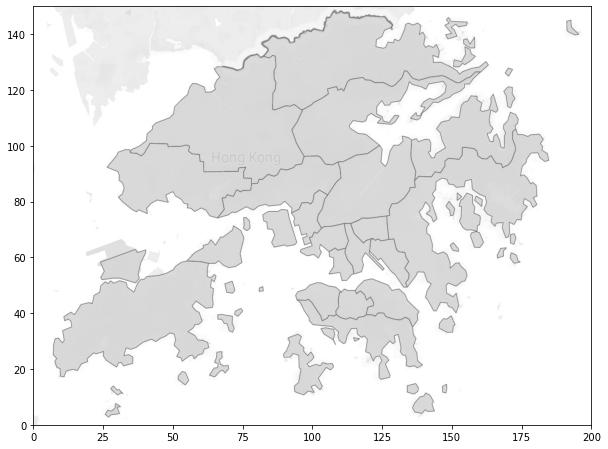

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,15))

im = plt.imread("hk_map.jpg")
implot = plt.imshow(im, extent=[0, 200, 0, 150])

In [4]:
#csv list:
csv_list = ['tung-chung, hongkong-air-quality.csv','central_western,-hongkong-air-quality.csv','southern,-hongkong-air-quality.csv','eastern,-hongkong-air-quality.csv','sham-shui po, hongkong-air-quality.csv','causeway-bay, hongkong-air-quality.csv','tseung-kwan o, hongkong-air-quality.csv','sha-tin, hongkong-air-quality.csv','tsuen-wan, hongkong-air-quality.csv','tai-po, hongkong-air-quality.csv','tuen-mun, hongkong-air-quality.csv','yuen-long, hongkong-air-quality.csv','north,-hongkong-air-quality.csv','tap-mun, hongkong-air-quality.csv']
stationName = ['TungChungAQI','CentralAQI','SouthernAQI','EasternAQI','ShamShuiPoAQI','CausewayBayAQI','TkoAQI','ShaTinAQI','TsuenWanAQI','TaiPoAQI','TuenMunAQI','YuenLongAQI','NorthAQI','TapMunAQI']

#Data source: https://aqicn.org/data-platform/register/

In [5]:
df0 = pd.DataFrame()
for i in range(14):
    print(i)
    df = pd.read_csv('AQI_Data/'+csv_list[i])
    df = df.rename(columns={' pm25': 'pm25', ' pm10': 'pm10',' o3':'o3',' no2':'no2',' so2':'so2',' co':'co'})
    for i in range(len(df.columns)-1):
        df.iloc[:,i+1] = pd.to_numeric(df.iloc[:,i+1].str[1:])
    try:
        df['AQI'] = df[['pm25','pm10','o3','no2','so2','co']].max(axis=1)
    except:
        df['AQI'] = df[['pm25','pm10','o3','no2','so2']].max(axis=1)
    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values(by='date',ascending=False).reset_index(drop = True)
    df = df.groupby(pd.Grouper(key='date', freq='Y')).agg({'AQI': 'mean'}).reset_index().sort_values(by='date',ascending=False).reset_index(drop=True)
    df['date'] = df['date'].dt.strftime('%Y')
    df0 = pd.concat([df0,df], axis = 1)
df0

0
1
2
3
4
5
6
7
8
9
10
11
12
13


,date,AQI,date,AQI,date,AQI,date,AQI,date,AQI,...,date,AQI,date,AQI,date,AQI,date,AQI,date,AQI
0,2022,51.700935,2022,53.655280,2022,47.616822,2022,48.928349,2022,46.689441,...,2022,51.421875,2022,60.302181,2022,58.647975,2022,51.339564,2022,50.112150
1,2021,57.084932,2021,54.495890,2021,47.870879,2021,51.526027,2021,50.257534,...,2021,55.189041,2021,63.175342,2021,58.063014,2021,53.964384,2021,53.131507
2,2020,50.471233,2020,54.463014,2020,58.561538,2020,50.213699,2020,49.764384,...,2020,53.473973,2020,63.427397,2020,54.438356,2020,63.623077,2020,52.605479
3,2019,64.151099,2019,66.442308,NaN,NaN,2019,60.651099,2019,60.857143,...,2019,66.879121,2019,75.285714,2019,65.675824,NaN,NaN,2019,62.074176
4,2018,58.241096,2018,68.309589,NaN,NaN,2018,61.443836,2018,67.769863,...,2018,63.747945,2018,77.189041,2018,65.797260,NaN,NaN,2018,60.909605
5,2017,66.505525,2017,69.132597,NaN,NaN,2017,65.019337,2017,68.000000,...,2017,69.395028,2017,80.922652,2017,69.961326,NaN,NaN,2017,65.629834
6,2016,64.816438,2016,67.715068,NaN,NaN,2016,60.665753,2016,71.126027,...,2016,65.378082,2016,79.049315,2016,70.561644,NaN,NaN,2016,63.308682
7,2015,67.516484,2015,76.472527,NaN,NaN,2015,70.851648,2015,76.785714,...,2015,72.651099,2015,82.645604,2015,83.651099,NaN,NaN,2015,69.041916
8,2014,72.338843,2014,80.603306,NaN,NaN,2014,68.939394,2014,94.170799,...,2014,78.666667,2014,84.035714,2014,92.110193,NaN,NaN,2014,78.504132
9,2013,62.000000,2013,67.000000,NaN,NaN,2013,61.000000,2013,73.000000,...,2013,65.000000,2013,89.000000,2013,85.000000,NaN,NaN,2013,77.000000


In [6]:
date = df0.iloc[:,0]
df0 = df0.drop(['date'],axis = 1)
df0.insert(0, 'date', date)
df0

,date,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI,AQI
0,2022,51.700935,53.655280,47.616822,48.928349,46.689441,66.660436,50.090343,49.940810,49.585670,51.421875,60.302181,58.647975,51.339564,50.112150
1,2021,57.084932,54.495890,47.870879,51.526027,50.257534,72.865753,49.893151,49.989041,54.939726,55.189041,63.175342,58.063014,53.964384,53.131507
2,2020,50.471233,54.463014,58.561538,50.213699,49.764384,70.901370,47.299169,51.257534,52.482192,53.473973,63.427397,54.438356,63.623077,52.605479
3,2019,64.151099,66.442308,NaN,60.651099,60.857143,81.763736,NaN,59.379121,63.903846,66.879121,75.285714,65.675824,NaN,62.074176
4,2018,58.241096,68.309589,NaN,61.443836,67.769863,86.641096,NaN,61.131507,63.712329,63.747945,77.189041,65.797260,NaN,60.909605
5,2017,66.505525,69.132597,NaN,65.019337,68.000000,89.668508,NaN,64.930939,68.723757,69.395028,80.922652,69.961326,NaN,65.629834
6,2016,64.816438,67.715068,NaN,60.665753,71.126027,90.049451,NaN,61.813889,65.416438,65.378082,79.049315,70.561644,NaN,63.308682
7,2015,67.516484,76.472527,NaN,70.851648,76.785714,99.788462,NaN,70.780220,70.791209,72.651099,82.645604,83.651099,NaN,69.041916
8,2014,72.338843,80.603306,NaN,68.939394,94.170799,102.785124,NaN,74.953168,69.936639,78.666667,84.035714,92.110193,NaN,78.504132
9,2013,62.000000,67.000000,NaN,61.000000,73.000000,91.000000,NaN,66.000000,57.000000,65.000000,89.000000,85.000000,NaN,77.000000


In [7]:
cols=pd.Series(df0.columns)
for dup in df0.columns[df0.columns.duplicated(keep=False)]: 
    cols[df0.columns.get_loc(dup)] = ([dup + '.' + str(d_idx) 
                                     if d_idx != 0 
                                     else dup 
                                     for d_idx in range(df0.columns.get_loc(dup).sum())]
                                    )
df0.columns=cols
for i in range(14):
    df0 = df0.rename(columns={df0.columns[i+1]: stationName[i]})
df0 = df0.head(12*3)

In [8]:
df0 = df0.iloc[::-1]
df0['date']=df['date'].astype(int)
df0

,date,TungChungAQI,CentralAQI,SouthernAQI,EasternAQI,ShamShuiPoAQI,CausewayBayAQI,TkoAQI,ShaTinAQI,TsuenWanAQI,TaiPoAQI,TuenMunAQI,YuenLongAQI,NorthAQI,TapMunAQI
9,2013,62.000000,67.000000,NaN,61.000000,73.000000,91.000000,NaN,66.000000,57.000000,65.000000,89.000000,85.000000,NaN,77.000000
8,2014,72.338843,80.603306,NaN,68.939394,94.170799,102.785124,NaN,74.953168,69.936639,78.666667,84.035714,92.110193,NaN,78.504132
7,2015,67.516484,76.472527,NaN,70.851648,76.785714,99.788462,NaN,70.780220,70.791209,72.651099,82.645604,83.651099,NaN,69.041916
6,2016,64.816438,67.715068,NaN,60.665753,71.126027,90.049451,NaN,61.813889,65.416438,65.378082,79.049315,70.561644,NaN,63.308682
5,2017,66.505525,69.132597,NaN,65.019337,68.000000,89.668508,NaN,64.930939,68.723757,69.395028,80.922652,69.961326,NaN,65.629834
4,2018,58.241096,68.309589,NaN,61.443836,67.769863,86.641096,NaN,61.131507,63.712329,63.747945,77.189041,65.797260,NaN,60.909605
3,2019,64.151099,66.442308,NaN,60.651099,60.857143,81.763736,NaN,59.379121,63.903846,66.879121,75.285714,65.675824,NaN,62.074176
2,2020,50.471233,54.463014,58.561538,50.213699,49.764384,70.901370,47.299169,51.257534,52.482192,53.473973,63.427397,54.438356,63.623077,52.605479
1,2021,57.084932,54.495890,47.870879,51.526027,50.257534,72.865753,49.893151,49.989041,54.939726,55.189041,63.175342,58.063014,53.964384,53.131507
0,2022,51.700935,53.655280,47.616822,48.928349,46.689441,66.660436,50.090343,49.940810,49.585670,51.421875,60.302181,58.647975,51.339564,50.112150


In [9]:
df0['date']=df['date'].astype(int)
type(df0['date'][0])

numpy.int64

In [10]:
#temp data
#Air
Tung_Chung = df0.iloc[:,1].tolist()
Central = df0.iloc[:,2].tolist()
Southern = df0.iloc[:,3].tolist()
Eastern = df0.iloc[:,4].tolist()
ShamShuiPo = df0.iloc[:,5].tolist()
Causeway_Bay = df0.iloc[:,6].tolist()
TKO = df0.iloc[:,7].tolist()
Sha_Tin = df0.iloc[:,8].tolist()
Tsuen_Wan = df0.iloc[:,9].tolist()
Tai_Po = df0.iloc[:,10].tolist()
Tuen_Mun = df0.iloc[:,11].tolist()
Yuen_Long = df0.iloc[:,12].tolist()
North = df0.iloc[:,13].tolist()
Tap_Mun = df0.iloc[:,14].tolist()

year = df0.iloc[:,0].tolist()

<ipython-input-11-94f842b7f8af>:1: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


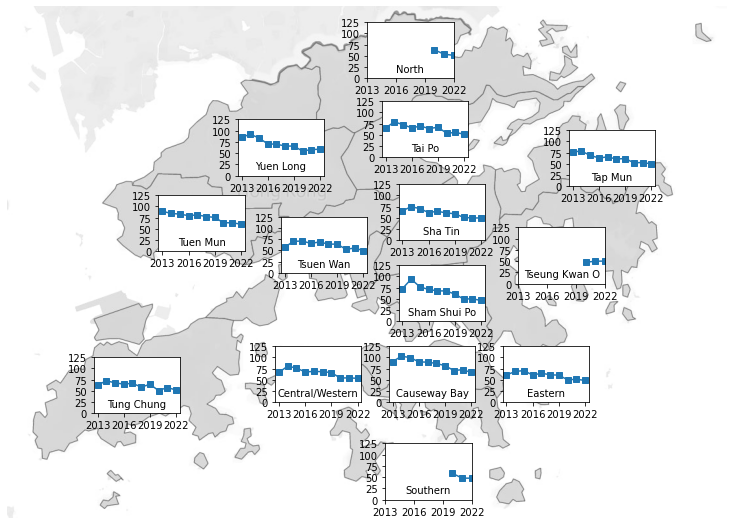

In [11]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from matplotlib.pyplot import figure
import mplcursors

fig = plt.figure(figsize=(10, 15),facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
im = plt.imread("hk_map.jpg")
implot = plt.imshow(im)
plt.xticks([])

# this is an inset axes over the main axes for the top left region
a = plt.axes([.12, .36, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
crs = mplcursors.cursor(a,hover=True)

crs.connect("add", lambda sel: sel.annotation.set_text(
    f"Year:{year[sel.target.index]}\nAQI:{Tung_Chung[sel.target.index]}"))
plt.title('Tung Chung', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Tung_Chung, marker="s")

a = plt.axes([.372, .37, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Central/Western', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Central, marker="s")

a = plt.axes([.53, .37, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Causeway Bay', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Causeway_Bay, marker="s")

a = plt.axes([.688, .37, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Eastern', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Eastern, marker="s")

a = plt.axes([.525, .28, .12, .052], facecolor='w')
plt.ylim([0, 125])
plt.xlim(year[0], year[-1])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Southern', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Southern, marker="s")

a = plt.axes([.71, .48, .12, .052], facecolor='w')
plt.ylim([0, 125])
plt.xlim(year[0], year[-1])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Tseung Kwan O', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, TKO, marker="s")

a = plt.axes([.5435, .445, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Sham Shui Po', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, ShamShuiPo, marker="s")

a = plt.axes([.5435, .52, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Sha Tin', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Sha_Tin, marker="s")

a = plt.axes([.38, .49, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Tsuen Wan', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Tsuen_Wan, marker="s")

a = plt.axes([.52, .597, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Tai Po', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Tai_Po, marker="s")

a = plt.axes([.21, .51, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Tuen Mun', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Tuen_Mun, marker="s")

a = plt.axes([.32, .58, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Yuen Long', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Yuen_Long, marker="s")

a = plt.axes([.50, .67, .12, .052], facecolor='w')
plt.xlim(year[0], year[-1])
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('North', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, North, marker="s")

a = plt.axes([.78, .57, .12, .052], facecolor='w')
plt.ylim([0, 125])
myLocator = mticker.MultipleLocator(3)
a.xaxis.set_major_locator(myLocator)
yLocator = mticker.MultipleLocator(25)
a.yaxis.set_major_locator(yLocator)
plt.title('Tap Mun', y=1.0, pad=-50, fontdict={'fontsize': 10})
plt.plot(year, Tap_Mun, marker="s")

plt.show()

In [53]:
fig.savefig('AQI.png')

In [12]:
df = pd.read_csv(r'Beach_Data/beach-historical-data2020-en.csv')
df.rename(columns = {'Beach Name':'Beach','Sampling Date (DD/MM/YYYY)':'Date','E. coli count per 100mL on the sampling date': 'Sample'}, inplace = True)
df['Date'] = pd.DatetimeIndex(df['Date']).year
new_df0 = df.groupby(['Beach', 'Date']).agg({'Sample': 'mean'})
new_df0.columns = ['sample_mean']
new_df0 = new_df0.reset_index()
new_df0['sample_mean'] = new_df0['sample_mean'].round(decimals = 2)
new_df0

#Data source: https://data.gov.hk/en-data/dataset/hk-epd-beachteam-beach-historical-data-en

,Beach,Date,sample_mean
0,Anglers' Beach,2020,234.32
1,Approach Beach,2020,412.61
2,Big Wave Bay Beach,2020,97.67
3,Butterfly Beach,2020,318.26
4,Cafeteria New Beach,2020,155.85
5,Cafeteria Old Beach,2020,255.94
6,Casam Beach,2020,166.27
7,Castle Peak Beach,2020,634.54
8,Cheung Chau Tung Wan Beach,2020,47.12
9,Chung Hom Kok Beach,2020,187.75


In [13]:
df1 = pd.read_csv('Beach_Data/beach-historical-data2019-en.csv')
df1.rename(columns = {'Beach Name':'Beach','Sampling Date (DD/MM/YYYY)':'Date','E. coli count per 100mL on the sampling date': 'Sample'}, inplace = True)
df1['Date'] = pd.DatetimeIndex(df1['Date']).year
new_df1 = df1.groupby(['Beach', 'Date']).agg({'Sample': 'mean'})
new_df1.columns = ['sample_mean']
new_df1 = new_df1.reset_index()
new_df1['sample_mean'] = new_df1['sample_mean'].round(decimals = 2)
new_df1

,Beach,Date,sample_mean
0,Anglers' Beach,2019,211.15
1,Approach Beach,2019,195.67
2,Big Wave Bay Beach,2019,251.38
3,Butterfly Beach,2019,144.34
4,Cafeteria New Beach,2019,104.51
5,Cafeteria Old Beach,2019,175.87
6,Casam Beach,2019,182.08
7,Castle Peak Beach,2019,276.92
8,Cheung Chau Tung Wan Beach,2019,31.66
9,Chung Hom Kok Beach,2019,277.82


In [19]:
final_df = pd.concat([new_df0, new_df1], ignore_index=True)
final_df

,Beach,Date,sample_mean
0,Anglers' Beach,2020,234.32
1,Approach Beach,2020,412.61
2,Big Wave Bay Beach,2020,97.67
3,Butterfly Beach,2020,318.26
4,Cafeteria New Beach,2020,155.85
...,...,...,...
82,Ting Kau Beach,2019,239.95
83,Tong Fuk Beach,2019,13.90
84,Trio Beach,2019,69.87
85,Turtle Cove Beach,2019,77.13


In [20]:
for i in range(1,10):
    df = pd.read_csv(r'Beach_Data/beach-historical-data200'+str(i)+'-en.csv')
    df.rename(columns = {'Beach Name':'Beach','Sampling Date (DD/MM/YYYY)':'Date','E. coli count per 100mL on the sampling date': 'Sample'}, inplace = True)
    df['Date'] = pd.DatetimeIndex(df['Date']).year
    df = df.groupby(['Beach', 'Date']).agg({'Sample': 'mean'})
    df.columns = ['sample_mean']
    df = df.reset_index()
    df['sample_mean'] = df['sample_mean'].round(decimals = 2)
    final_df = pd.concat([final_df, df], ignore_index=True)
for i in range(10,19):
    df = pd.read_csv(r'Beach_Data/beach-historical-data20'+str(i)+'-en.csv')
    df.rename(columns = {'Beach Name':'Beach','Sampling Date (DD/MM/YYYY)':'Date','E. coli count per 100mL on the sampling date': 'Sample'}, inplace = True)
    df['Date'] = pd.DatetimeIndex(df['Date']).year
    df = df.groupby(['Beach', 'Date']).agg({'Sample': 'mean'})
    df.columns = ['sample_mean']
    df = df.reset_index()
    df['sample_mean'] = df['sample_mean'].round(decimals = 2)
    final_df = pd.concat([final_df, df], ignore_index=True)
final_df

,Beach,Date,sample_mean
0,Anglers' Beach,2020,234.32
1,Approach Beach,2020,412.61
2,Big Wave Bay Beach,2020,97.67
3,Butterfly Beach,2020,318.26
4,Cafeteria New Beach,2020,155.85
...,...,...,...
868,Ting Kau Beach,2018,261.90
869,Tong Fuk Beach,2018,10.35
870,Trio Beach,2018,27.00
871,Turtle Cove Beach,2018,5.05


In [21]:
final_df = final_df.sort_values('Date').reset_index(drop=True)
final_df

,Beach,Date,sample_mean
0,Trio Beach,2001,62.79
1,Hairpin Beach,2001,46.74
2,Golden Beach,2001,138.15
3,Gemini Beaches,2001,641.28
4,Discovery Bay,2001,46.71
...,...,...,...
868,Lo So Shing Beach,2020,38.94
869,Lido Beach,2020,137.12
870,Kwun Yam Beach,2020,32.24
871,Kiu Tsui (New),2020,22.50


In [22]:
temp = final_df.groupby(['Beach'])['sample_mean'].apply(list)
res = pd.DataFrame({'Beach':temp.index, 'list':temp.values})
res

,Beach,list
0,Anglers' Beach,"[1098.96, 2081.25, 1521.55, 1267.38, 1544.45, ..."
1,Approach Beach,"[641.38, 1096.6, 1127.1, 711.48, 1180.87, 922...."
2,Big Wave Bay Beach,"[349.82, 100.7, 147.63, 112.33, 308.24, 193.2,..."
3,Butterfly Beach,"[146.56, 88.21, 136.18, 109.66, 102.9, 187.32,..."
4,Cafeteria New Beach,"[219.6, 133.26, 110.14, 101.52, 128.43, 237.59..."
5,Cafeteria Old Beach,"[266.38, 147.0, 102.48, 124.66, 175.95, 226.62..."
6,Casam Beach,"[441.04, 1314.02, 1046.53, 958.4, 1151.18, 763..."
7,Castle Peak Beach,"[439.85, 117.6, 125.95, 231.73, 201.1, 255.59,..."
8,Cheung Chau Tung Wan Beach,"[51.07, 51.74, 41.59, 75.36, 47.77, 84.83, 59...."
9,Chung Hom Kok Beach,"[43.33, 57.0, 223.63, 39.46, 44.1, 56.24, 38.8..."


In [23]:
Coordinates = [[22.364805485720254, 114.05594743853688],[22.36745829334091, 114.08602772986136],[22.246563430876154, 114.24716255990234],[22.37274748333596, 113.95645181215725],[22.37355342015393, 113.98677173199845],[22.375270147126027, 113.98418539248289],[22.36757972803291, 114.074908251537],[22.37956791534192, 113.97960833069283],[22.21039178253311, 114.02993887394258],[22.217620422373038, 114.20216687286909],[22.291134944680753, 114.29099957792428],[22.288241729819067, 114.28776583280896],[22.24389408672067, 114.1880410488942],[22.29819514923795, 114.01536738375385],[22.36392464605362, 114.06927955911142],[22.372194327252174, 113.98801522210495],[22.224033746025015, 114.21507500587829],[22.35721000820716, 114.29429223973942],[22.36483488529008, 114.07110683982087],[22.218728731932906, 114.11971451468223],[22.37653783528402, 113.98144016865709],[22.367692267734313, 114.28735926386187],[22.36831427364566, 114.28876054362283],[22.207268408799155, 114.03409159923973],[22.36763992994288, 114.07613538100452],[22.20441856024502, 114.12263346461683],[22.232395734163756, 113.94544301799574],[22.349983403479055, 114.061677555632],[22.229704285379025, 114.19808455927304],[22.239701454653222, 113.97678100913038],[22.23636757625453, 114.19637631530613],[22.23170452966603, 114.25188280859115],[22.231415352784673, 114.25203807769596],[22.270584643245883, 113.99938494351966],[22.322604403568274, 114.27226275860988],[22.22495555244463, 114.1975634549142],[22.211902510226448, 114.21460761803317],[22.220190457218354, 114.21429117400965],[22.4719901825197, 114.22958386901769],[22.36921767295203, 114.08048648214934],[22.22817643596967, 113.93543064775658],[22.357635004140175, 114.26789299053583],[22.232896981090565, 114.22337040616982],[22.23412736896008, 113.95412028461548]]
res['coordinates'] = Coordinates
res

,Beach,list,coordinates
0,Anglers' Beach,"[1098.96, 2081.25, 1521.55, 1267.38, 1544.45, ...","[22.364805485720254, 114.05594743853688]"
1,Approach Beach,"[641.38, 1096.6, 1127.1, 711.48, 1180.87, 922....","[22.36745829334091, 114.08602772986136]"
2,Big Wave Bay Beach,"[349.82, 100.7, 147.63, 112.33, 308.24, 193.2,...","[22.246563430876154, 114.24716255990234]"
3,Butterfly Beach,"[146.56, 88.21, 136.18, 109.66, 102.9, 187.32,...","[22.37274748333596, 113.95645181215725]"
4,Cafeteria New Beach,"[219.6, 133.26, 110.14, 101.52, 128.43, 237.59...","[22.37355342015393, 113.98677173199845]"
5,Cafeteria Old Beach,"[266.38, 147.0, 102.48, 124.66, 175.95, 226.62...","[22.375270147126027, 113.98418539248289]"
6,Casam Beach,"[441.04, 1314.02, 1046.53, 958.4, 1151.18, 763...","[22.36757972803291, 114.074908251537]"
7,Castle Peak Beach,"[439.85, 117.6, 125.95, 231.73, 201.1, 255.59,...","[22.37956791534192, 113.97960833069283]"
8,Cheung Chau Tung Wan Beach,"[51.07, 51.74, 41.59, 75.36, 47.77, 84.83, 59....","[22.21039178253311, 114.02993887394258]"
9,Chung Hom Kok Beach,"[43.33, 57.0, 223.63, 39.46, 44.1, 56.24, 38.8...","[22.217620422373038, 114.20216687286909]"


In [24]:
res[['2020','2019','2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006','2005','2004','2003','2002','2001']] = pd.DataFrame(res.list.tolist(), index= res.index)
res[['latitude','longitude']] = pd.DataFrame(res.coordinates.tolist(), index= res.index)
res = res.drop(res.columns[[1, 2]], axis=1)
res

,Beach,2020,2019,2018,2017,2016,2015,2014,2013,2012,...,2008,2007,2006,2005,2004,2003,2002,2001,latitude,longitude
0,Anglers' Beach,1098.96,2081.25,1521.55,1267.38,1544.45,1664.28,1022.53,1061.65,853.85,...,471.38,285.16,167.03,98.16,112.18,337.79,211.15,234.32,22.364805,114.055947
1,Approach Beach,641.38,1096.60,1127.10,711.48,1180.87,922.03,683.53,501.71,388.68,...,276.48,186.74,256.31,166.70,383.87,171.00,195.67,412.61,22.367458,114.086028
2,Big Wave Bay Beach,349.82,100.70,147.63,112.33,308.24,193.20,66.51,127.05,248.98,...,75.02,237.39,68.96,769.67,324.36,216.46,251.38,97.67,22.246563,114.247163
3,Butterfly Beach,146.56,88.21,136.18,109.66,102.90,187.32,131.68,130.46,99.37,...,168.36,81.62,189.97,338.02,199.36,157.51,144.34,318.26,22.372747,113.956452
4,Cafeteria New Beach,219.60,133.26,110.14,101.52,128.43,237.59,140.92,77.14,101.03,...,108.15,86.59,51.92,77.41,85.08,43.35,104.51,155.85,22.373553,113.986772
5,Cafeteria Old Beach,266.38,147.00,102.48,124.66,175.95,226.62,134.95,85.76,83.29,...,71.82,142.67,208.49,124.49,177.49,94.55,175.87,255.94,22.375270,113.984185
6,Casam Beach,441.04,1314.02,1046.53,958.40,1151.18,763.66,558.16,890.71,270.76,...,180.24,146.43,138.31,85.76,165.18,190.68,182.08,166.27,22.367580,114.074908
7,Castle Peak Beach,439.85,117.60,125.95,231.73,201.10,255.59,150.71,89.03,65.58,...,147.03,296.65,261.13,213.86,243.95,155.57,276.92,634.54,22.379568,113.979608
8,Cheung Chau Tung Wan Beach,51.07,51.74,41.59,75.36,47.77,84.83,59.29,34.21,52.50,...,150.03,67.44,221.63,23.97,112.74,18.71,31.66,47.12,22.210392,114.029939
9,Chung Hom Kok Beach,43.33,57.00,223.63,39.46,44.10,56.24,38.87,43.17,137.97,...,17.37,130.31,160.80,27.31,19.59,15.52,277.82,187.75,22.217620,114.202167


In [25]:
from datetime import datetime
b_year = [2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001]
b_year = b_year[::-1]
b_year

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [29]:
import plotly.express as px
import mpld3
for i in range(0,44):
    fig = px.line(x = b_year ,
                  y = res.iloc[i,:-2].to_list()[1:][::-1],
                  title = res.iloc[i,0])
    fig.update_layout(
        xaxis_title="Year",
        yaxis_title="E. coli count per 100ml"
    )

    fig.write_html(res.iloc[i,0]+".html")

In [465]:
res.to_csv('beach.csv')